# Artificial Neural Networks (ANN)



## Neural networks

### Perceptron
Neural network consists of few layers of perceptrons. Each perceptron simulates the operation of neuron. It collects input variables $x_i$, weights them with coefficients $w_i$, and sums the result to one value. The output value is obtained by scaling the sum between values 0...1 by using an activation function. For classification, the activation function is binary step function, and for regression, it is continuous, like sigmoid function. The neuron can be teached by updating the weights $w_i$.

![Perceptron](kuvat/perceptron.svg)

The output of the perceptron is

$$
  y = f\left(\mathbf{x} \cdot \mathbf{w} + w_0\right) 
  = f\left( \Sigma_{i=1}^{n} (x_i w_i) + w_0 \right)
$$

### Activation functions

Common activation functions, $f()$, are 
 1. Linear
 1. Sigmoid
 1. Hyperbolic tangent (tanh())
 1. REctified Linear activation fUnction (RELU)
 
Percepton networks using linear activation function are easy to train, but they cannot solve as complex problems as networks using non-linear activation functions. Sigmoid, also known as logistic function, was originally the default activation function, but it was replaced with hyperbolic tangent which seemed to be easier to train and performing better. 
 
A problem with both sigmoid and hyperbolic tangent is, however, that they saturate to constant output when the input is large or small, which leads to derivative approaching to zero which slows down the training.

ReLu is simple activation function which supports fast learning due to being mostly linear and allows learning complex problems being piecewise non-linear. ReLu is especially usefull when training deep neural networks.
 
Read more about activation function from [RELU for deep learning NN](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/).

Sigmoid: $$ f(x)=\frac{1}{1+e^{-x}} $$

Tanh: $$f(x)=\frac{e^x - e^{-x}}{e^x + e^{-x}} $$

Relu: $$f(x) = \begin{cases} 0 &  \text{if} ~ x<0 \\ x & \text{otherwise} \end{cases}$$

### Implementation of activation functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

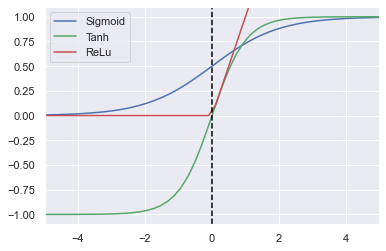

In [2]:
sigmoid = lambda x: 1/(1+np.exp(-x))
tanh = np.tanh
relu = lambda x: [max(0,y) for y in x]
x=np.linspace(-5,5)

plt.plot(x, sigmoid(x), color='b', label='Sigmoid')
plt.plot(x, tanh(x), color='g', label='Tanh')
plt.plot(x, relu(x), color='r', label='ReLu')
plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.axis([-5,5,-1.1,1.1])
plt.savefig('activation_functions.svg')

### Implementation of perceptron

In [3]:
def perceptron(X,W,activation='relu'):
    if activation == 'tanh':
        f=np.tanh
    elif activation == 'sigmoid':
        f=lambda x: 1.0/(1+np.exp(-x))
    else:
        if activation != 'relu':
            print("Unknown activation function, using ReLu")
        f=lambda x: max(0,x)
    return f(W[0] + sum(X*W[1:]))

### Testing of a perceptron

In [4]:
W=np.array([-1.0,1.0])
N=100
x=np.linspace(-6,6,N)
y=np.zeros(N)

def test(w0=0.0, w1=1.0, activation='sigmoid'):
    global W,x
    W[:] = (w0,w1)
    y=[perceptron(xx, W, activation) for xx in x]
    plt.figure()
    plt.plot(x,y)
    plt.axvline(0, linestyle='--')
    
interact(test, w0=(-3.0,3.0),w1=(-1.0,1.0), activation=['sigmoid', 'tanh', 'relu'])

interactive(children=(FloatSlider(value=0.0, description='w0', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

<function __main__.test(w0=0.0, w1=1.0, activation='sigmoid')>

### Learning algorithms

When using Stochastic Gradient Descent (**SGD**) training,  the weights, $w_i$, are updated towards the gradient (multidimensional derivative) or the loss function. 
$$
    w \leftarrow w - \eta \left(\alpha \frac{\partial R(w)}{\partial w} + \frac{\partial L(w)}{\partial w}\right),
$$

where $\eta$ is the learning rate, $\alpha$ is the regularization term (L2 penalty for exessive model complexity), $R$ is a function related to model complexity and $L$ is a loss function. The weights of the model are simply updated to the direction where the model loss is reduced and model complexity is reduced. 

**Adams** is slightly more advanced and can optimize the parameters of the search, and find optimum faster. Another common learning method is **L-BFGS** (Limited memory, Broyden-Fletcher-Goldfarb-Shannon). It is also using the second derivatives of the search space and is thus faster, when the derivatives and memory resources are available. 

![Training of MLP](kuvat/mlp_training.svg)

### Multi layer perceptron

A single perceptron can only handle simple problems. For more complex problems, a network of several layers of perceptrons are needed. These networks are called as Multi Layer Perceptron networks (MLP) or artificial neural networks (ANN). When the number of hidden layer is large, the network is called as Deep Neural Network (DNN) and it is one example of Deep Learning.

![Perceptron](kuvat/mlp.svg)

## Training a neural network

Training of a neural network is carried out through following steps

1. The training data, including input data $X$ and the correct answers $y$ is selected
1. The training data is split in one or more **batches**
1. The training of the network is carried out it **iterations**, each iteration uses one batch of training data. The results of the network is compared against the correct output, and the coefficients of the network are updated to produce better results next time
1. The training is proceed in next iteration, until all batches of input data is consumed
1. At this time one **EPOCH** passed. The training often continues by using the same data again, and the whole training process can last from one EPOCH up to hundreds of EPOCHs.

### When to stop training

 - The performance of the network usually improves when the traning continues.
 - The learning is fast in the beginning, but slows down after the network is well trained already 
 - If the training continues too long, the network starts memorizing the training data and the performance is still seemingly improving, but the network's capability to predict new data starts decreasing. This situation is called as overfitting.
 - The amount of overfitting may be monitored by testing the prediction also in the separate validation set which is not used for training.
 - When the performance in the validation set starts decreasing, it is time to stop training.

![When to stop trainig](kuvat/stoptraining.svg)

Try to train multi layer neural network models in [Neural Network Playground](https://playground.tensorflow.org/).


## Example

The above Iris example can be classified using Multi Layer Perceptron Classifier (MLPC) but SVM already handled that problem well and because the number of samples in the dataset is only 150, it is only sufficient for training very thin MLPC. Therefore, lets create an artificial classification problem with 1000 samples and tree partly overlapping classes to make the problem more challengin and train an MLPC for solving it. 

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.model_selection import cross_val_score
from snippets import plotDB

[[309  18   8]
 [ 10 321   4]
 [  3  13 314]]
Prediction accuracy is 0.944


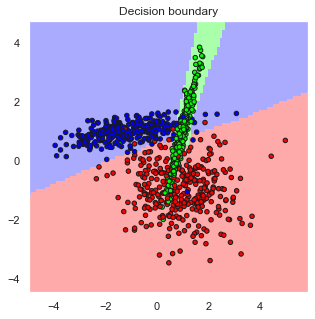

In [6]:
# Make a random 3-class classification problem, with 1000 samples and 2 features
X,y=data=datasets.make_classification(n_samples=1000, n_features=2, n_classes=3, random_state=2,
                                  n_clusters_per_class=1, n_informative=2, n_redundant=0)

# Create a multilayer perceptron classifier with 10 and 6 perceptrons in hidden layer
predictor = MLPClassifier(hidden_layer_sizes=(10,6), max_iter=1000)
predictor.fit(X=X, y=y)
classes = predictor.predict(X)

# Assess the accuracy of the classifier
accuracy = accuracy_score(y_true=y, y_pred=classes)
M=confusion_matrix(y, classes)

# Plot the results and decision boundaries
print(M)
print("Prediction accuracy is", accuracy)
plotDB(predictor, X=X, y=y, figsize=(5,5))


## Digits dataset

In [7]:
digits = datasets.load_digits()
X=digits.data
y=digits.target

predictor = MLPClassifier(hidden_layer_sizes=(6,), max_iter=1000)
predictor.fit(X=X, y=y)

classes = predictor.predict(X)

/home/petri/venv/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
print("Prediction accuracy is", accuracy)

# Assess the accuracy of the classifier
accuracy = accuracy_score(y_true=y, y_pred=classes)
cvscore = cross_val_score(predictor, X, y).mean()
M=confusion_matrix(y, classes)

# Plot the results and decision boundaries
print(M)
print("Prediction accuracy is   ", accuracy)
print("Prediction accuracy in CV", cvscore)

Prediction accuracy is 0.944
[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   1   0 182   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   1   0   0   0   0   0 179]]
Prediction accuracy is    0.9988870339454646
Prediction accuracy in CV 0.853644382544104


## Time series analysis

- In it's standard form, the neural network has no understanding of time, and it is therefore not very suitable for time series analysis, for example in predicting future values
- Several variations of Neural Networks are however suitable for time series analysis
- Recurrent Neural Networks (RNN), for example Recurreng Gate Units (GRU) and Long-Short-Term Memory (LSTM) networks are common methods for time series analysis with ANN
- Read more from [Recurrent Neural Networks cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)

![RNNimage](kuvat/RNN.svg)


## Convolutional neural network

- In deep image analysis networks, it is efficient to combine neural network with efficient image processing functions, such as convolution and subsampling (pooling).
- The following CNN network consists of 
  - 4 filters in the first convolutional layer , producing four feature maps for each image channel
  - a subsampling layer, for example 3x3 max pooling with stride=3, to reduce the image size to one third
  - 3 filters in the second convolutional layer, producing three features maps from each previous feature maps
  - a second subsampling layer, to reduce the image size
  - A fully connected layer of neurons
  - An output layer of output neurons

![Convolutional neural network](kuvat/cnn.png)

A nice description of convolutional neural network (CNN) is [here](https://wiki.pathmind.com/convolutional-network).

## Keras and Pytorch

MLP classifier and regressors use only CPU resources, but to utilize real power of ANN, they are often ran in massive parallel hardware, such as GPU:s. This is not necessary for simple neural network models shown above, but they become more important when the number of hidden layers in the network model increases and the model becomes deeper. 

Frameworks often used for Deep Neural Networks are for example Keras, Tensorflow and PyTorch.

 - Keras is a high level libary which uses underlying Tensorflow
 - PyTorch is lower level python interface for Torch library

[Keras examples](https://keras.io/examples/)

[Keras vs Pytorch for Deep Learning](https://towardsdatascience.com/keras-vs-pytorch-for-deep-learning-a013cb63870d)

[PyTorch vs Keras](https://towardsdatascience.com/keras-vs-pytorch-for-deep-learning-a013cb63870d)

[Why to choose Keras](https://keras.io/why_keras/)

### Example code for simple Keras processing

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import CenterCrop
from tensorflow.keras.layers import Rescaling

# Example image data, with values in the [0, 255] range
training_data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")

# Some preprocessing of the data
cropper = CenterCrop(height=150, width=150)
scaler = Rescaling(scale=1.0 / 255)

output_data = scaler(cropper(training_data))
print("shape:", output_data.shape)
print("min:", np.min(output_data))
print("max:", np.max(output_data))

shape: (64, 150, 150, 3)
min: 0.0
max: 1.0


### Convolutional neural network with Keral

The CNN model consists of layers, and the Keras API allows building the layered CNN model in very straightforward manner. Keras contains also many functions for preprocessing images and generating variations from existing image database, because the model contains plenty of parameters and needs therefore a large set of training images.

In [22]:
# Define an input layer, which can be arbitrary size, but include 3 channels (RGB)
inputs = keras.Input(shape=(None, None, 3))

# Center-crop images to 150x150
x = CenterCrop(height=150, width=150)(inputs)

# Rescale images to [0, 1]
x = Rescaling(scale=1.0 / 255)(x)

# Apply some convolution and pooling layers
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3))(x) # 50x50
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3))(x) # 16x16
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)

# Apply global average pooling to get flat feature vectors
x = layers.GlobalAveragePooling2D()(x)

# Add a dense classifier on top
num_classes = 10
outputs = layers.Dense(num_classes, activation="softmax")(x)

In [23]:
# Instantiate the model object
model = keras.Model(inputs=inputs, outputs=outputs)

data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")
processed_data = model(data)
print(processed_data.shape)

(64, 10)


In [19]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 center_crop_3 (CenterCrop)  (None, 150, 150, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                           

The next steps would be the compile and train the model. Then the performance in the training set and validation set would be tested. You can see the full process in [OpenCV and Keras | Traffic Sign Classification for Self-Driving Car](https://www.geeksforgeeks.org/opencv-and-keras-traffic-sign-classification-for-self-driving-car/?ref=rp)

Notice that the model consist of nearly 20 thousand parameters. I takes plenty of data and time to train the model. The training time can be from 10 minutes to days, depending of the complexity of the model and the calculation capacity available.

## Pre trained models

Since the training of the neural network models is so time consuming, an important topics in deep learning are pre trained models and transfer learning (the model trained to one application is used in another related application without retraining, or partial re-training.

Some huge deep networks can be also used as general purpose neural networks. One of the biggest network this far is the Generative Pre-trained Transformer 3 ([GPT-3](https://en.wikipedia.org/wiki/GPT-3)), which is suitable for many Natural Language Processing (NLP) tasks. GPT-3 sisältää 175 billion ($175 \cdot 10^9$) parameters. GPT-3 can generate text wich is difficult to distinguish from a human writer.

[VGG16](https://www.geeksforgeeks.org/vgg-16-cnn-model/) is a winning model from Visual Geometry Group Lab of Oxford University, presented in 2014 in the paper *Very deep convolutional networks fo large-scale image recognition*.

[A robot wrote this entire article. Are you scared yet, human](https://www.theguardian.com/commentisfree/2020/sep/08/robot-wrote-this-article-gpt-3)

## More information
- [OpenCV and Keras | Traffic Sign Classification for Self-Driving Car](https://www.geeksforgeeks.org/opencv-and-keras-traffic-sign-classification-for-self-driving-car/?ref=rp)
- Read more from [Keras for engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/)
- [Convolutional Neural Networks cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)
- [Recurrent Neural Networks cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)

## Summary

- Artificial Neural Networks (ANN) based on perceptrons, are versatile machine learning methods for both regression and classification. Deep and dense networks can learn to handle complex tasks, but the deeper the network, the more training data is needed.
- Deep learning can be implemented using many hidden layers in ANN. Deep learning requires large amount of training data.
- Deep learning is often used for image processing with convolutional neural networks
- Keras and PyTorch are common libraries for implementing deep learning. They can utilize both CPU:s and NVidia GPU:s for training and predicting